In [4]:
#starting imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm


In [5]:
#left eye represented by 0 and right eye 1
#this shell converting the images into array and with some scripting I stored the label from its name
training_data = []
path = "‪E:\\datasets\\left right images".rsplit("\u202a")[1]
IMG_SIZE = 28
for img in tqdm(os.listdir(path)):  
    if 'left' in img:
        class_num = 0
    else:
        class_num = 1
    try:
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
        training_data.append([new_array, class_num]) 
    except Exception as e:
        print("problem")
        break

100%|████████████████████████████████████████████████████████████████████████████| 12052/12052 [03:37<00:00, 55.39it/s]


In [6]:
#separating image's array and labels of them
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

#reshaping as every pixel can a single array 
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

#converting all into 0 to 1, as 255 is the max value in color cmbination
X = X/255.0

In [7]:
#all keras imports

from keras.models import Sequential,load_model,model_from_json
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping

Using TensorFlow backend.
C:\Users\Saiful-Badhon\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Saiful-Badhon\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Saiful-Badhon\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users

In [8]:
#early stop
es = EarlyStopping(monitor='val_acc')

In [9]:
#the model
model2 = Sequential()

model2.add(Conv2D(512,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(2))

model2.add(Conv2D(128,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(MaxPooling2D(2))
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))
model2.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,1)))

model2.add(Flatten())
model2.add(Dense(2,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
#because of early stoping itteration stoped 
training = model2.fit(X, y, epochs=100, validation_split=0.2,callbacks=[es])

Instructions for updating:
Use tf.cast instead.
Train on 9641 samples, validate on 2411 samples
Epoch 1/100
9641/9641 [==============================] - 201s 21ms/step - loss: 0.3690 - acc: 0.8139 - val_loss: 0.1854 - val_acc: 0.9349
Epoch 2/100
9641/9641 [==============================] - 201s 21ms/step - loss: 0.1516 - acc: 0.9427 - val_loss: 0.1354 - val_acc: 0.9515
Epoch 3/100
9641/9641 [==============================] - 187s 19ms/step - loss: 0.1200 - acc: 0.9578 - val_loss: 0.1277 - val_acc: 0.9544
Epoch 4/100
9641/9641 [==============================] - 206s 21ms/step - loss: 0.1103 - acc: 0.9604 - val_loss: 0.1262 - val_acc: 0.9556
Epoch 5/100
9641/9641 [==============================] - 173s 18ms/step - loss: 0.1005 - acc: 0.9639 - val_loss: 0.1104 - val_acc: 0.9614
Epoch 6/100
9641/9641 [==============================] - 166s 17ms/step - loss: 0.0932 - acc: 0.9687 - val_loss: 0.1035 - val_acc: 0.9618
Epoch 7/100
9641/9641 [==============================] - 170s 18ms/step - lo

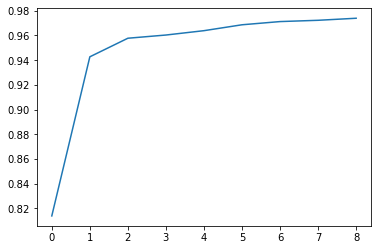

In [12]:
#below two graph is showing us there is no overfitting and I handle it with early stoping 
plt.plot(training.history['acc'])

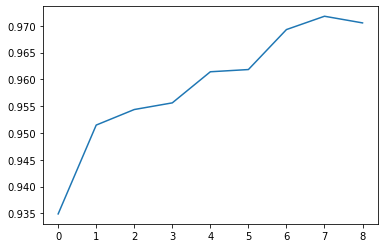

In [13]:
plt.plot(training.history['val_acc'])

In [14]:
#As keras dont suffle before splitting, so last 20% must be the test dataset. I will use this for creating a confusion matrix
test_data = training_data[9642:12052]

In [15]:
#making the data feedable
X_test = []
y_test = []

for features,label in test_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) 

X_test = X_test/255.0

In [16]:
#predicting with the test data 
y_predict = model2.predict_classes(X_test)

In [17]:
#creating the confusion matrix
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test, y_predict)
con_matrix

array([[1174,   31],
       [  40, 1165]], dtype=int64)

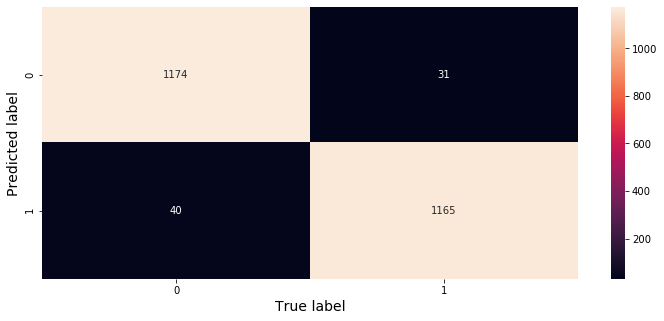

In [18]:
#some better visualization
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
f, ax = plt.subplots(figsize=(12,5))
sn.heatmap(con_matrix , annot=True,fmt="d")
ax.set_xlabel('True label', size=14)
ax.set_ylabel('Predicted label',size=14)

plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12)
plt.show()

In [19]:
#the summery and structure of my model
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 512)       5120      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 512)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       589952    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          73792     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 1, 1, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
__________

In [22]:
from sklearn.metrics import precision_recall_fscore_support as score



precision, recall, fscore, support = score(y_test, y_predict)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.96705107 0.97408027]
recall: [0.97427386 0.96680498]
fscore: [0.97064903 0.97042899]
support: [1205 1205]
